In [7]:
import numpy as np
import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
train_dir = r'C:/Documents/Codes/Text to Speech/text to speech/asl_dataset/'
labels = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d',
          'e','f','g','h','i','j','k','l','m','n','o','p','q','r',
          's','t','u','v','w','x','y','z']

In [9]:
labels = os.listdir(train_dir)
X_train = []
y_train = []
X_valid = []
y_valid = []
for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    for file in os.listdir(folderpath)[0:60]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[60:70]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_valid.append(np.array(img))
        y_valid.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(2160, 224, 224, 3)
(2160,)
(355, 224, 224, 3)
(355,)


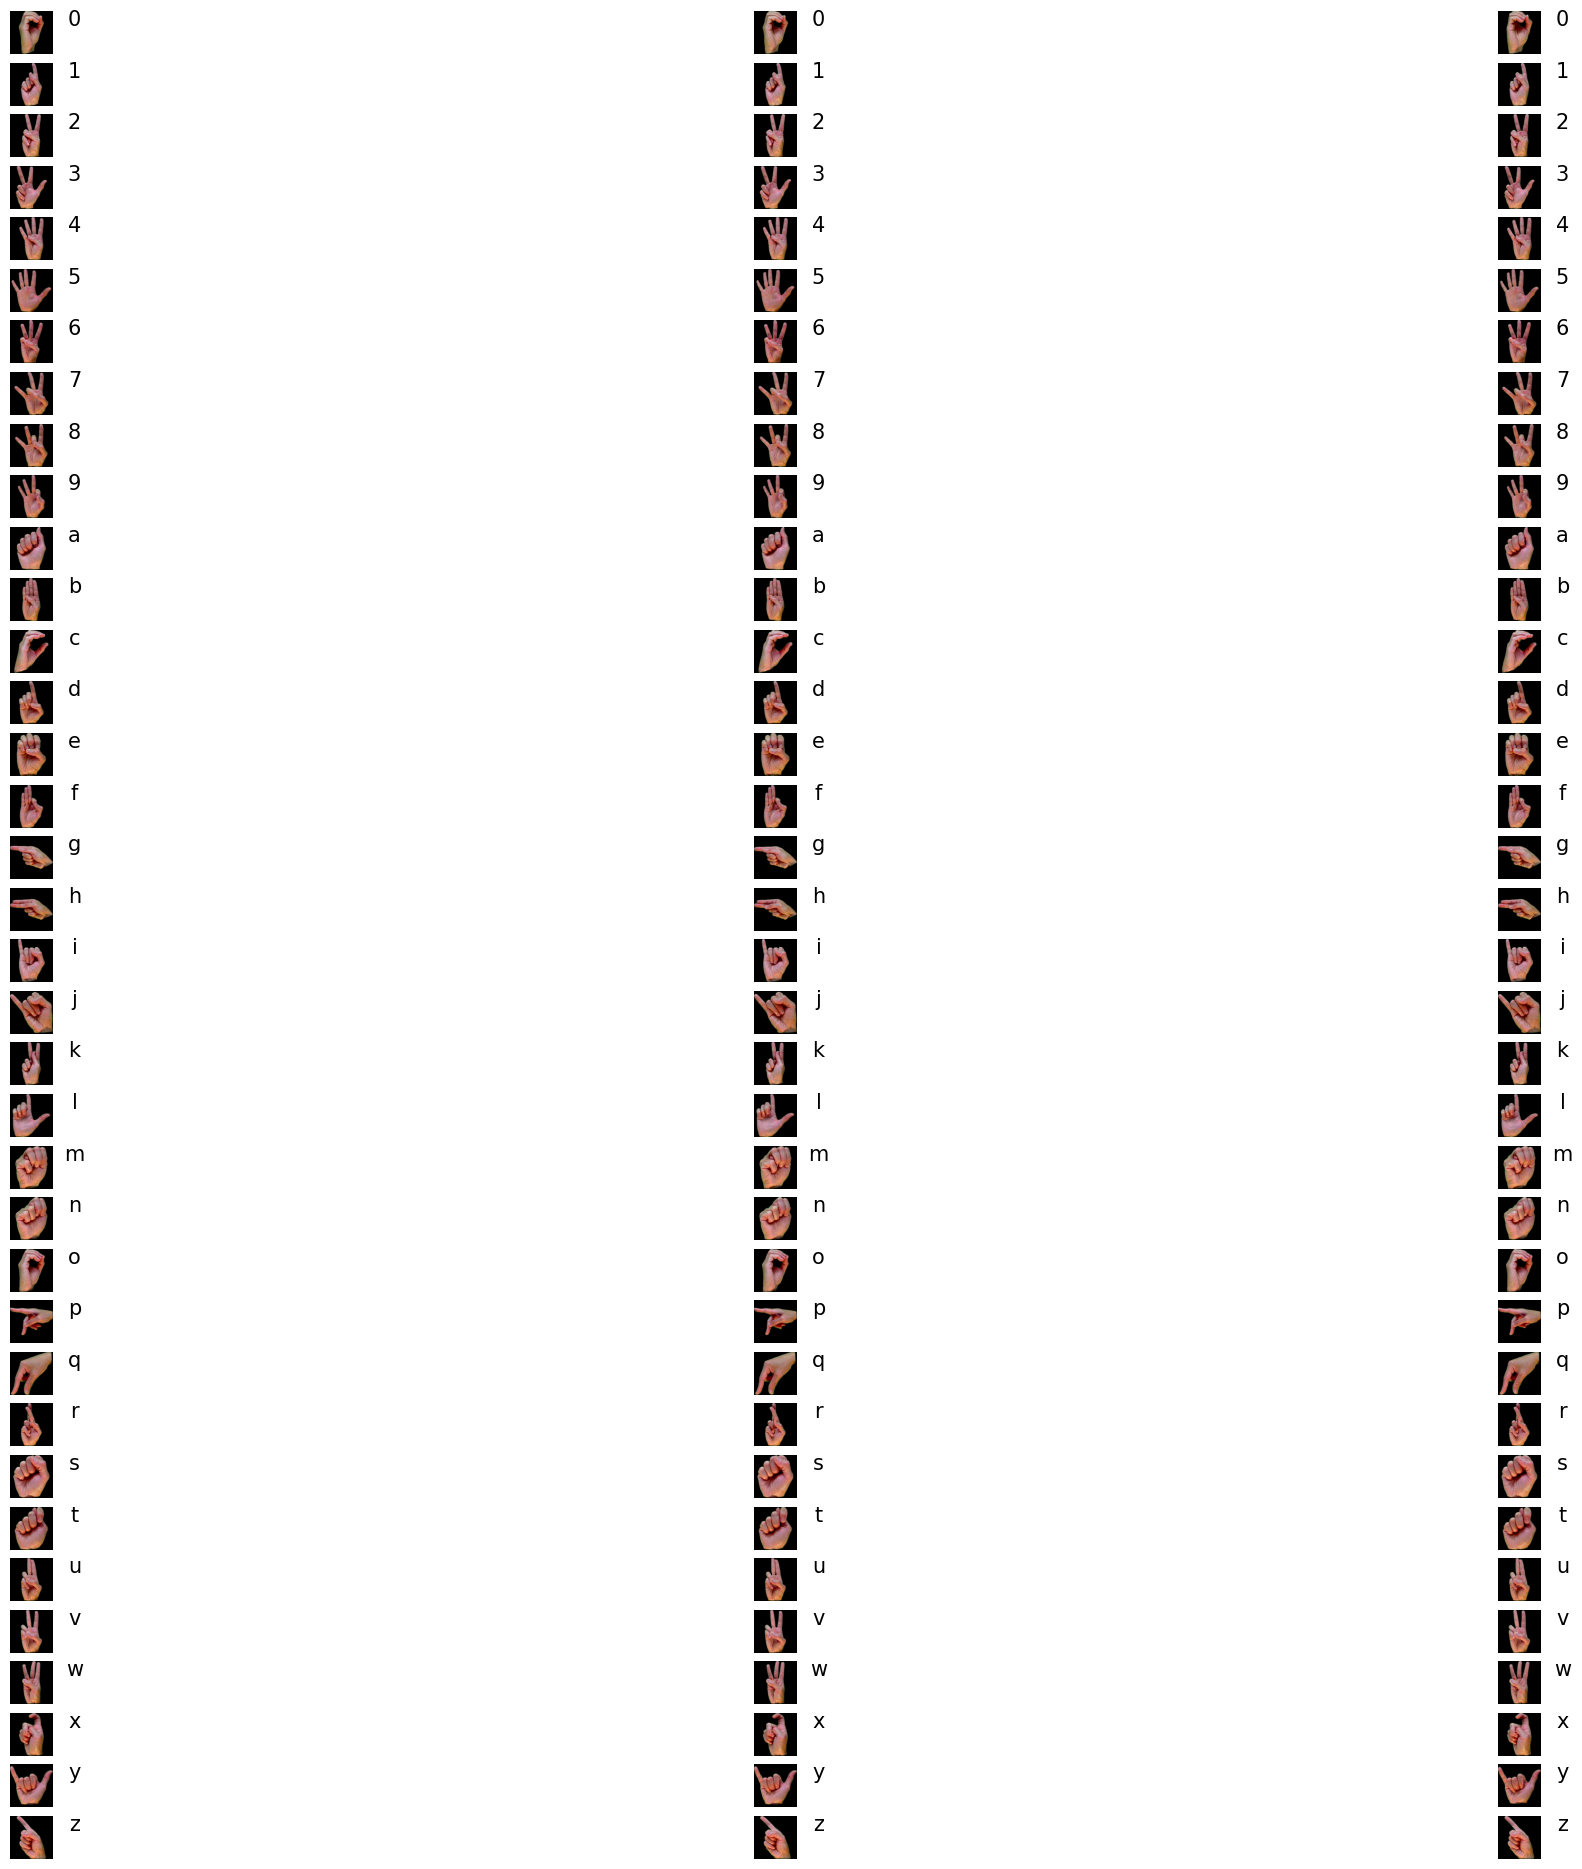

In [10]:
# display 3 random images with their labels
fig, axes = plt.subplots(nrows=len(labels), ncols=3, figsize=(24, 24))
fig.subplots_adjust(wspace=1)
for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    img_names = os.listdir(folderpath)[:3]
    for j, img_name in enumerate(img_names):
        img_path = folderpath + img_name
        img = plt.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].text(1.5, 0.8, label[-1], fontsize=15, ha='center', va='center', transform=axes[i, j].transAxes)
plt.show()

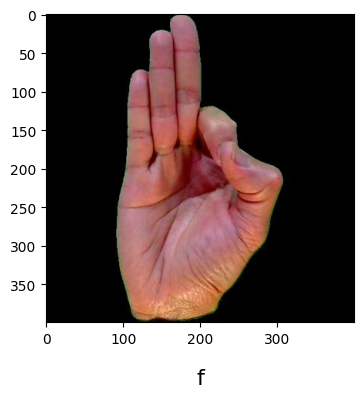

In [11]:
# choose a random label and a random image from the label folder
label = random.choice(labels) 
folderpath = train_dir + label + '/'
img_names = os.listdir(folderpath)[:3]
img_name = random.choice(img_names)  

# display the image with its label
fig, ax = plt.subplots(figsize=(4, 4))
img_path = folderpath + img_name
img = plt.imread(img_path)
ax.imshow(img)
ax.text(0.5, -0.2, label, fontsize=16, ha='center', transform=ax.transAxes)

plt.show()

In [12]:
# define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), 
    Dense(128, activation='relu'), #FC layer
    Dropout(0.5),
    Dense(len(labels), activation='softmax') # last dense layer (the classifier)
])

C:\Users\poona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [16]:
# train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=10,
                    batch_size=64,
                    callbacks=[early_stop])

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9407 - loss: 0.1882 - val_accuracy: 0.5859 - val_loss: 2.8690
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9530 - loss: 0.1618 - val_accuracy: 0.6056 - val_loss: 2.9486
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9595 - loss: 0.1194 - val_accuracy: 0.5775 - val_loss: 3.1464
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9688 - loss: 0.1006 - val_accuracy: 0.5944 - val_loss: 2.9894
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9692 - loss: 0.1068 - val_accuracy: 0.6141 - val_loss: 2.8122
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9649 - loss: 0.1116 - val_accuracy: 0.6085 - val_loss: 2.8850
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9629 - loss: 0.0903 - val_accuracy: 0.5803 - val_loss: 3.2607
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9656 - loss: 0.1020 - val_accuracy: 0.6141 - val_loss:

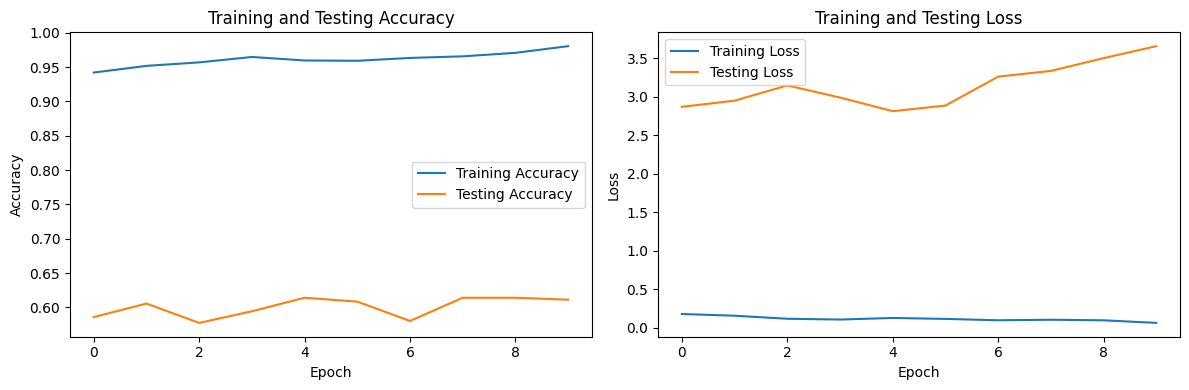

In [17]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Save the trained model for future use
model.save('sign_language_model.h5')

In [19]:
# evaluate the model on the train set
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', train_acc)

68/68 - 11s - 155ms/step - accuracy: 0.9995 - loss: 6.6934e-04
Train accuracy: 0.9995370507240295


In [20]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_valid, y_valid, verbose=2)
print('Test accuracy:', test_acc)

12/12 - 2s - 145ms/step - accuracy: 0.6113 - loss: 3.6564
Test accuracy: 0.611267626285553


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step


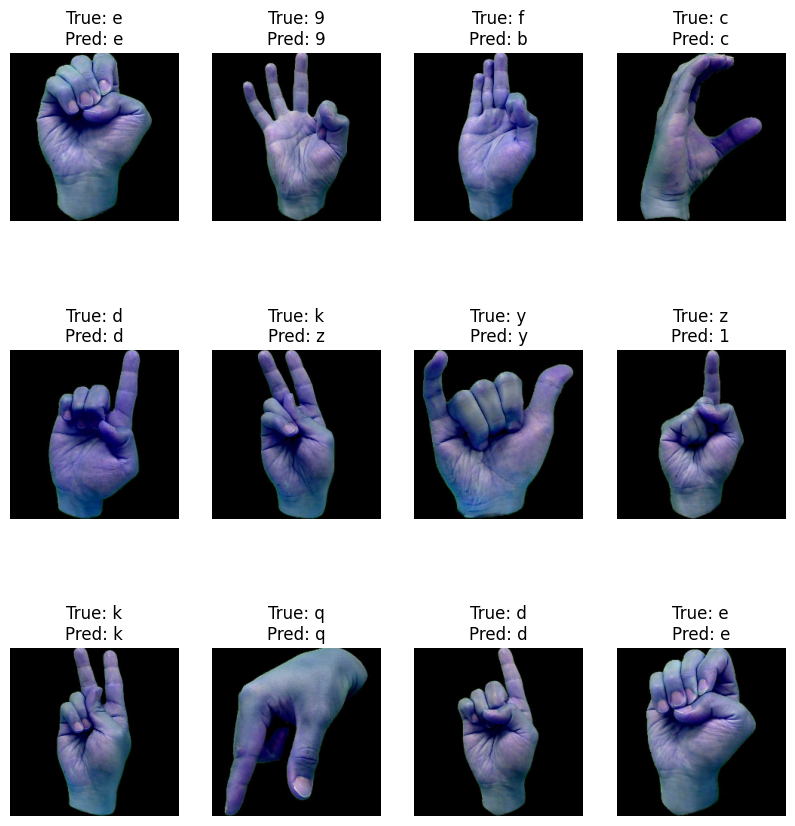

In [21]:
 #get the predicted labels for the test set
y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)

# display random predictions
fig, axs = plt.subplots(3, 4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.7, wspace= 0.2)
for i, ax in enumerate(axs.flat):
    idx = random.randint(0, len(X_valid)-1) 
    ax.imshow(X_valid[idx])
    ax.set_title(f"True: {labels[y_valid[idx]]}\nPred: {labels[y_pred_labels[idx]]}")
    ax.axis('off')
plt.show()

In [22]:
pip install gtts

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install ipython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
import random
from gtts import gTTS
import IPython.display as ipd
import time

def speak(y_pred_labels, y_valid, labels):
    elements = random.sample(range(len(y_pred_labels)), 3)
    
    pred_labels = [y_pred_labels[idx] for idx in elements]
    true_labels = [y_valid[idx] for idx in elements]
    
    # Iterate over the selected samples and speak out both true and predicted labels
    for i, (pred_label, true_label) in enumerate(zip(pred_labels, true_labels)):
        pred_label_text = labels[pred_label]
        true_label_text = labels[true_label]
        
        # Speak out the predicted label
        pred_text = f"Predicted Label: {pred_label_text}"
        pred_speech = gTTS(text=pred_text, lang="en", slow=False)
        pred_speech_file = f"predicted_label_{i}.mp3"
        pred_speech.save(pred_speech_file)
        print(pred_text) 
        ipd.display(ipd.Audio(pred_speech_file, autoplay=True))
        time.sleep(5)  # Add a delay between speaking predicted and true labels
        
        # Speak out the true label
        true_text = f"True Label: {true_label_text}"
        true_speech = gTTS(text=true_text, lang="en", slow=False)
        true_speech_file = f"true_label_{i}.mp3"
        true_speech.save(true_speech_file)
        print(true_text) 
        ipd.display(ipd.Audio(true_speech_file, autoplay=True))
        time.sleep(5)  
        
        os.remove(pred_speech_file)
        os.remove(true_speech_file)
        
speak(y_pred_labels, y_valid, labels)


Predicted Label: f


True Label: f


Predicted Label: x


True Label: x


Predicted Label: i


True Label: i
